In [1]:
# 4.2.1 2乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
import numpy as np

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [87]:
# 4.2.2 交差エントロピー誤差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [9]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [12]:
# 4.2.3 ミニバッチ学習
import numpy as np
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [13]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]

In [14]:
# 4.2.4 [バッチ対応版] 交差エントロピー誤差の実装
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [17]:
np.array([0,1]).reshape(1, 2).shape

(1, 2)

In [19]:
# 4.3 数値微分
# 4.3.1 微分
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

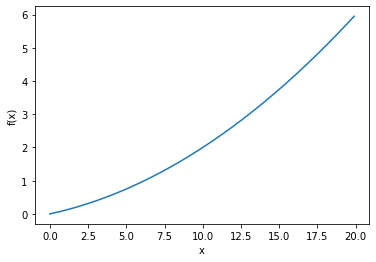

In [23]:
# 4.3.2 数値微分の例
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [24]:
numerical_diff(function_1, 5)

0.1999999999990898

In [25]:
numerical_diff(function_1, 10)

0.2999999999986347

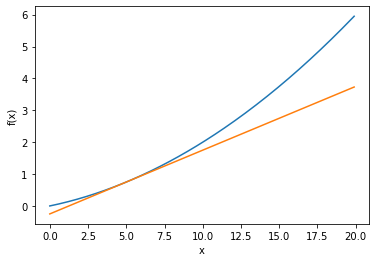

In [29]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

a = numerical_diff(function_1, 5)
b = function_1(5) - a * 5
y = a*x + b
plt.plot(x, y)

plt.show()

In [42]:
# 4.3.3 偏微分
def function_2(x):
    return x[0]**2 + x[1]**2

In [37]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [39]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
    
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [99]:
# 4.4 勾配
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        tmp_val = x[i]
        
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val
    
    return grad

In [45]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [47]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [48]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [54]:
# 4.4.1 勾配法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [55]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [56]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [57]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [93]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [88]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [89]:
net = simpleNet()
print(net.W)

[[-0.40147417  0.13966387  0.68055509]
 [ 0.5116708  -1.10780292 -0.56091769]]


In [90]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.21961922 -0.91322431 -0.09649287]


In [91]:
np.argmax(p)

0

In [92]:
t = np.array([0, 0, 1])
net.loss(x, t)

[ 0.21961922 -0.91322431 -0.09649287]
[0.48754476 0.15704597 0.35540927]
1.0344849900040356


1.0344849900040356

In [97]:
def f(w):
    return net.loss(x, t)

In [124]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 値を元に戻す
        it.iternext()

In [104]:
# nditerサンプル
np_array = np.random.randn(1, 2, 3)
print(np_array)

nditer = np.nditer(np_array, flags=['multi_index'])
while not nditer.finished:
    print(nditer.multi_index)
    print(np_array[nditer.multi_index])
    nditer.iternext()

[[[ 0.50852692  0.03905869  0.60278441]
  [-1.17155044  0.53695593  0.61420442]]]
(0, 0, 0)
0.5085269202190541
(0, 0, 1)
0.039058685530112734
(0, 0, 2)
0.6027844096406537
(0, 1, 0)
-1.1715504439646196
(0, 1, 1)
0.536955931813874
(0, 1, 2)
0.6142044238232668


In [102]:
dW = numerical_gradient(f, net.W)
print(dW)

[ 0.21973922 -0.91322431 -0.09649287]
[0.48757474 0.15703678 0.35538848]
1.0345434971572585
[ 0.21961922 -0.91322431 -0.09649287]
[0.48754476 0.15704597 0.35540927]
1.0344849900040356
[ 0.21967922 -0.91316431 -0.09649287]
[0.48755515 0.15704932 0.35539553]
1.0345236658491286
[ 0.21967922 -0.91328431 -0.09649287]
[0.48756434 0.15703343 0.35540223]
1.0345048208892889
[ 0.21967922 -0.91322431 -0.09643287]
[0.48754935 0.15703803 0.35541262]
1.034475567486763
[ 0.21967922 -0.91322431 -0.09655287]
[0.48757014 0.15704472 0.35538513]
1.034552919599814
[ 0.21976922 -0.91322431 -0.09649287]
[0.48758223 0.15703449 0.35538328]
1.0345581245077162
[ 0.21958922 -0.91322431 -0.09649287]
[0.48753726 0.15704827 0.35541447]
1.034470363777881
[ 0.21967922 -0.91313431 -0.09649287]
[0.48755286 0.15705329 0.35539385]
1.0345283773869483
[ 0.21967922 -0.91331431 -0.09649287]
[0.48756664 0.15702946 0.3554039 ]
1.0345001099471762
[ 0.21967922 -0.91322431 -0.09640287]
[0.48754415 0.15703635 0.35541949]
1.03445622

In [111]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [125]:
# 4.5.1 2層ニューラルネットワークのクラス
class TwoLayerNet:
    # 初期化
    # input_size: 入力層のニューロンの数
    # hidden_size: 隠れ層のニューロンの数
    # output_size: 出力層のニューロンの数
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        
        # 1層目の重み
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        
        # 1層目のバイアス
        self.params['b1'] = np.zeros(hidden_size)
        
        # 2層目の重み
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        
        # 2層目のバイアス
        self.params['b2'] = np.zeros(output_size)
    
    # 予測
    # x: 画像データ
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 損失関数
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 正解率
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 勾配計算
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [126]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [119]:
net.params['W1'].shape

(784, 100)

In [116]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [120]:
t = np.random.rand(100, 10)

In [127]:
grads = net.numerical_gradient(x, t)

In [ ]:
# 4.5.2 ミニバッチ学習の実装
import numpy as np
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learning_rage = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 勾配の計算
    grad = network.numerical_gradient(X_batch, y_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] = learning_rate * grad[key]
        
    # 学習結果の記録
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)

↑numerical_gradientがすごく遅いのでこのままだとまともに動かない